In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
dados_ml= pd.read_excel('dados_ml_balanceado.xlsx', sheet_name= 'Plan1')

In [98]:
dados_exp = pd.read_excel('dados_exp.xlsx', sheet_name= 'Plan1')

In [4]:
dados_exp.head()

,Idempresacorreto,idfunc,150M,Tipinstitu,origcapital,capitaberto,setor,operação no Brasil,fx_tempregados,rotgeral,...,cltfx,fxtempempr,fx_cargo,fx_salario,fx_localtrab,fx_escol,catSexo,cat_retnaemp,categ_futnaemp,fx_desemp
0,9,72355,2,Empresa privada,Nacional,Sim,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,De 21% a 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Administrativo,"De R$ 954,01 a R$ 1908,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Remuneração e Benefícios,2-Entre 1 e 3 anos,A_M
1,74,224974,1,Empresa privada,Nacional,Não,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,Acima de 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Vendedor,"De R$ 954,01 a R$ 1908,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Satisfação com o Trabalho,2-Entre 1 e 3 anos,A_M
2,165,118267,1,Empresa privada,Nacional,Não,Serviços,De 11 a 30 anos,De 1501 a 5000 empregados,Acima de 30% do quadro de funcionários,...,Sim,De 6 meses a 1 ano incompleto,Vendedor,"De R$ 954,01 a R$ 1908,00",Loja / Atendimento ao consumidor / Agência / C...,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Remuneração e Benefícios,2-Entre 1 e 3 anos,A_M
3,26,228084,2,Empresa privada,Multinacional,Sim,Agronegócio,Acima de 30 anos,De 1501 a 5000 empregados,De 11% a 20% do quadro de funcionários,...,Sim,De 1 a 2 anos incompletos,Supervisor / Coordenador,"De R$ 11448,01 a R$ 15264,00",Fábrica / Produção / Agrícola / Obra / Laborat...,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Prestígio Organizacional,2-Entre 1 e 3 anos,A_M
4,102,274200,2,Empresa privada,Multinacional,Não,Serviços,Acima de 30 anos,De 1501 a 5000 empregados,De 21% a 30% do quadro de funcionários,...,Sim,De 1 a 2 anos incompletos,Técnico de nível superior (universitário)/espe...,"De R$ 2862,01 a R$ 3816,00",Escritório / Corporativo / Administrativo,"Curso Superior (Bacharelado, Licenciatura ou H...",Masculino,Falta de Alternativas,2-Entre 1 e 3 anos,A_M


# Definição de variáveis

In [99]:
y = dados_ml['fx_desemp']

In [100]:
x1 = dados_ml[['150m', 'tipinstitu','genz','origcapital', 'capitaberto', 'setor', 'anos de operação no Brasil', 'totempr', 'prevquadro', 'rotgeral', 'clt', 'tempempr', 'cargo', 'fxsalarial', 'loctrab', 'sexo', 'retnaemp', 'escolaridade', 'meb', 'mci', 'mpa', 'msd', 'mri', 'mgc', 'mpo', 'mqvt', 'medc', 'mlid', 'mrec', 'mestr', 'rot_vol', 'categ_futnaemp']]

# Análise exploratória

In [7]:
explorat1= dados_exp.pivot_table(values= ['emp.brand','com.int','part.aut','sust.diver','rel.int','carr','pro.org','qvt','educ.corp','lid','recomp','estr.obj'],index='cat_retnaemp',columns='fx_desemp')
explorat2= dados_exp.pivot_table(values= ['emp.brand','com.int','part.aut','sust.diver','rel.int','carr','pro.org','qvt','educ.corp','lid','recomp','estr.obj'],index='categ_futnaemp',columns='fx_desemp')

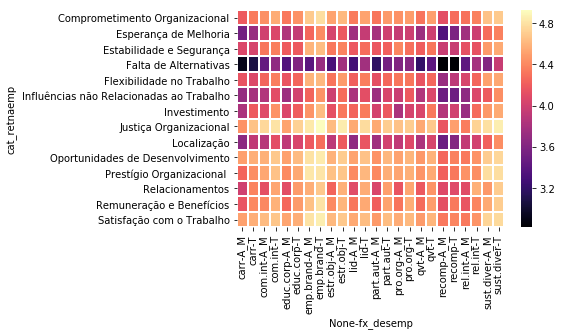

In [8]:
sns.heatmap(explorat1,cmap='magma',linecolor='white',linewidths=1)

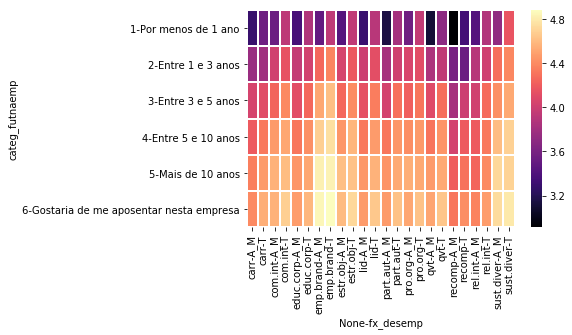

In [9]:
sns.heatmap(explorat2,cmap='magma',linecolor='white',linewidths=1)

# Modelo para prever desempenho (Regressão Logística)

In [101]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, 
                                                    random_state=101)

In [102]:
from sklearn.linear_model import LogisticRegression


In [103]:
logmodel = LogisticRegression()
logmodel.fit(x1_train,y_train)

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
predictions = logmodel.predict(x1_test)

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.75      0.70      0.73       258
           2       0.70      0.75      0.73       240

   micro avg       0.73      0.73      0.73       498
   macro avg       0.73      0.73      0.73       498
weighted avg       0.73      0.73      0.73       498



In [107]:
taxa_acerto = accuracy_score(y_test, predictions)

In [108]:
taxa_acerto

0.7269076305220884

In [109]:
naot= 'Não é talento'
simt= 'É talento'

In [110]:
predictions = logmodel.predict_proba(x1_test)

In [111]:
predictions = pd.DataFrame(predictions, columns= (naot, simt)).round(2)

In [112]:

final= pd.concat([x1_test.reset_index(), y_test.reset_index(), predictions], axis=1)

In [113]:
final.head()

,index,150m,tipinstitu,genz,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,medc,mlid,mrec,mestr,rot_vol,categ_futnaemp,index,fx_desemp,Não é talento,É talento
0,1847,1,1,1,2,1,5,35,2,2,...,4.571429,4.7,4.25,4.25,1.969873,5,1847,2,0.18,0.82
1,355,1,1,3,2,1,5,40,2,1,...,3.571429,3.9,3.25,4.00,3.888025,6,355,1,0.36,0.64
2,2087,1,2,1,1,1,4,60,2,1,...,5.000000,5.0,5.00,5.00,5.258900,5,2087,2,0.24,0.76
3,2023,1,2,3,2,1,5,126,2,2,...,3.000000,2.9,3.25,2.25,13.274336,3,2023,2,0.73,0.27
4,59,1,2,3,2,1,5,27,1,3,...,4.857143,5.0,5.00,5.00,5.533597,3,59,1,0.16,0.84


In [114]:
final['prob_sertalento']= predictions['É talento']

In [115]:
finaltempo= final['prob_sertalento']

In [116]:
def tempo_talento (finaltempo):
    if finaltempo > 0.90:
        return'+- 1 ano'
    elif finaltempo > 0.70:
        return '+- 2 anos'
    elif finaltempo > 0.50:
        return '+- 3 anos'
    else:
        return 'Acima de 4 anos'

In [117]:
final ['tempo_talento']= list(map(tempo_talento,finaltempo))

In [118]:
final= final. sort_values(by='tempo_talento')

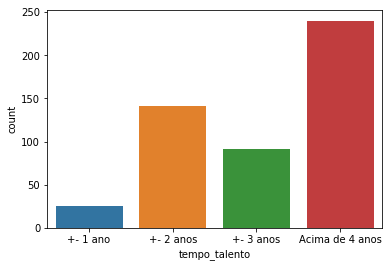

In [119]:
sns.countplot(x='tempo_talento',data= final)

In [120]:
categfut= final['categ_futnaemp']

In [121]:
def futnaemp (categfut):
    if categfut == 1:
        return'Por menos de 1 ano'
    elif categfut == 2:
        return 'Entre 1 a 3 anos'
    elif categfut == 3:
        return 'Entre 3 e 5 anos'
    elif categfut == 4:
        return 'Entre 5 e 10 anos'
    elif categfut == 5:
        return 'Acima de 10 anos'
    elif categfut == 6:
        return 'Gostaria de me aposentar aqui'

In [122]:
final['Futuro na empresa']= list(map(futnaemp,categfut))

In [123]:
final= final. sort_values(by='tempo_talento')

C:\Users\silva\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


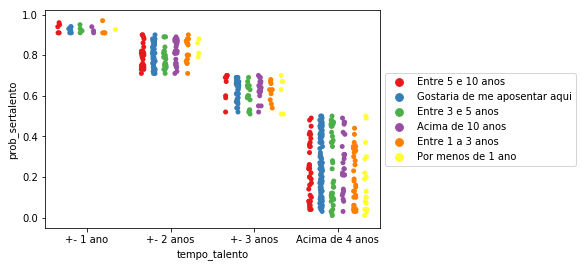

In [124]:
sns.stripplot(x="tempo_talento", y="prob_sertalento", data=final,jitter=True,hue='Futuro na empresa',palette='Set1',split=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [125]:
interval = (final['prob_sertalento'] > 0.7)
final_intervalcritic = final.loc[interval]

C:\Users\silva\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


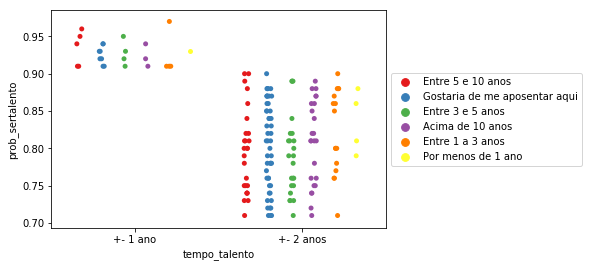

In [126]:
sns.stripplot(x="tempo_talento", y="prob_sertalento", data=final_intervalcritic,jitter=True,hue='Futuro na empresa',palette='Set1',split=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [127]:
interval = (final['prob_sertalento'] > 0.7) & (final['Futuro na empresa'] == 'Por menos de 1 ano')
final_intervalcriticesp = final.loc[interval]

In [128]:
final_intervalcriticesp

,index,150m,tipinstitu,genz,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,mestr,rot_vol,categ_futnaemp,index,fx_desemp,Não é talento,É talento,prob_sertalento,tempo_talento,Futuro na empresa
177,1280,1,2,2,2,1,5,7,1,1,...,4.25,9.740260,1,1280,2,0.07,0.93,0.93,+- 1 ano,Por menos de 1 ano
446,1376,1,2,3,2,1,5,27,1,1,...,5.00,5.533597,1,1376,2,0.12,0.88,0.88,+- 2 anos,Por menos de 1 ano
6,1707,1,2,2,2,1,4,5,2,2,...,5.00,5.709625,1,1707,2,0.19,0.81,0.81,+- 2 anos,Por menos de 1 ano
37,56,1,4,3,2,1,5,25,1,2,...,5.00,15.000000,1,56,1,0.14,0.86,0.86,+- 2 anos,Por menos de 1 ano
13,1413,2,2,3,2,1,5,17,1,1,...,3.50,11.525424,1,1413,2,0.21,0.79,0.79,+- 2 anos,Por menos de 1 ano


# Avaliação das variáveis preditoras (Randon Forest)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
rfc_pred = rfc.predict(x1_test)

In [136]:
print(classification_report(y_test,rfc_pred))



              precision    recall  f1-score   support

           1       0.88      0.63      0.73       258
           2       0.70      0.90      0.79       240

   micro avg       0.76      0.76      0.76       498
   macro avg       0.79      0.77      0.76       498
weighted avg       0.79      0.76      0.76       498



In [135]:
taxaforest_acerto = accuracy_score(y_test, rfc_pred)

In [138]:
taxaforest_acerto

0.7630522088353414

In [139]:
gp= ['grupo previsto']
rfc_predbd = pd.DataFrame(rfc_pred, columns= gp)

In [140]:
y_testbd= pd.DataFrame(y_test)

In [141]:
finalforest= pd.concat([x1_test.reset_index(), y_testbd.reset_index(), rfc_predbd], axis=1)

In [143]:
finalforest.head()

,index,150m,tipinstitu,genz,origcapital,capitaberto,setor,anos de operação no Brasil,totempr,prevquadro,...,mqvt,medc,mlid,mrec,mestr,rot_vol,categ_futnaemp,index,fx_desemp,grupo previsto
0,1847,1,1,1,2,1,5,35,2,2,...,4.625,4.571429,4.7,4.25,4.25,1.969873,5,1847,2,2
1,355,1,1,3,2,1,5,40,2,1,...,3.000,3.571429,3.9,3.25,4.00,3.888025,6,355,1,2
2,2087,1,2,1,1,1,4,60,2,1,...,5.000,5.000000,5.0,5.00,5.00,5.258900,5,2087,2,2
3,2023,1,2,3,2,1,5,126,2,2,...,3.250,3.000000,2.9,3.25,2.25,13.274336,3,2023,2,1
4,59,1,2,3,2,1,5,27,1,3,...,4.750,4.857143,5.0,5.00,5.00,5.533597,3,59,1,2


In [144]:
forest = ExtraTreesClassifier()
forest.fit(x1_train, y_train)
importanciasarr = forest.feature_importances_

C:\Users\silva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [145]:
importancias= ['importâncias']
importanciastab= pd.DataFrame(data= importanciasarr, index= x1.columns, columns= importancias).round(3)

In [147]:
importanciastab.sort_values(['importâncias'], ascending= False)

,importâncias
totempr,0.200
anos de operação no Brasil,0.051
capitaberto,0.043
rot_vol,0.038
tempempr,0.032
mqvt,0.031
retnaemp,0.029
setor,0.028
fxsalarial,0.028
rotgeral,0.027


In [148]:
importanciastab.to_excel('importancias_teste.xls', sheet_name= 'sheet1')

In [149]:
finalforest.to_excel('finalforest_teste.xls', sheet_name= 'sheet1')